In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def Plotbox(mdtf1,mcolum,morder):
    plt.rcParams['figure.dpi'] = 140
    sns.boxplot(x='test', y=mcolum, data=mdtf1, order=morder)
    ax = plt.gca()
    ax.grid(True)
    plt.show()
    
def Append8(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6,mdtf7,mdtf8):
    mdtf1 = mdtf1.append(mdtf2)
    mdtf1 = mdtf1.append(mdtf3)
    mdtf1 = mdtf1.append(mdtf4)
    mdtf1 = mdtf1.append(mdtf5)
    mdtf1 = mdtf1.append(mdtf6)
    mdtf1 = mdtf1.append(mdtf7)
    return mdtf1.append(mdtf8)

def Append6andCast(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6, O_column, simbol,value):
    mdtf1 = Append6(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6)
    mdtf1[O_column] = CastOutLayers(mdtf1, O_column, simbol,value)
    return mdtf1

def Append6(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6):
    mdtf1 = mdtf1.append(mdtf2)
    mdtf1 = mdtf1.append(mdtf3)
    mdtf1 = mdtf1.append(mdtf4)
    mdtf1 = mdtf1.append(mdtf5)
    return mdtf1.append(mdtf6)

def Append7andCast(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6,mdtf7, O_column, simbol,value):
    mdtf1 = Append7(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6,mdtf7)
    mdtf1[O_column] = CastOutLayers(mdtf1, O_column, simbol,value)
    return mdtf1

def getDates3(dft):
    sal = pd.to_datetime(dft.dateStore, format="%Y-%m-%d %H:%M:%S.%f")
    dft['latency in seconds'] = (sal-pd.to_datetime(dft.Agre_date, format="%Y-%m-%d %H:%M:%S.%f"))/ np.timedelta64(1, 's')
    return dft[['latency in seconds','test']]
    
def AppendAndPlot(df1,df2,df3,df4,df5,df6,
                  O_column, simbol, value, morder):
    ndf = Append(df1, df2, df3, df4, df5, df6).reset_index(drop=True)
    ndf[O_column] = CastOutLayers(ndf, O_column, simbol,value)
    Plotbox(ndf,O_column,morder)

def CastOutLayers(mdtf1, column, lowerorgreater,mlimit):
    aux = []
    for row in mdtf1[column]:
        if type(row) is str:
            row =row.replace(".", "")
        if lowerorgreater == "<":
            if float(row) > mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
        elif lowerorgreater == ">":
            if float(row) < mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
    return aux

In [9]:
def get_latency(dft):
    t_llegada = pd.to_datetime(dft.llegada, format="%Y-%m-%d %H:%M:%S.%f")
    t_envio = pd.to_datetime(dft.salida,  format="%Y-%m-%d %H:%M:%S.%f")
    dft['latency in seconds'] = ((t_llegada - t_envio)/2)/ np.timedelta64(1, 's')
    return dft[['latency in seconds','test']]

def Get_CSV(nameCSV):
    return pd.read_csv(nameCSV, names = ["timestamp1", "salida","llegada"])

def getDates3(dft):
    sal = pd.to_datetime(dft.Hora, format="%Y-%m-%d %H:%M:%S.%f")
    dft['latency in seconds'] = (sal-pd.to_datetime(dft.timestamp2, format="%Y-%m-%d %H:%M:%S.%f"))/ np.timedelta64(1, 's')
    return dft[['latency in seconds','test']]

def getMean(df1,df2,df3,df4,df5,df6,N_column):
    return [df1[N_column].mean(),df2[N_column].mean(),df3[N_column].mean(),
            df4[N_column].mean(),df5[N_column].mean(),df6[N_column].mean()]

def CastAndPlot1(df1,N_column,yLabel,morder):
    plt.rcParams['figure.dpi'] = 200
    plt.plot(morder,df1)
    ax = plt.gca()
    ax.grid(True)
    ax.grid(color='black', linestyle='-', linewidth=0.05)
    ax.set_axis_bgcolor('white')
    plt.legend([N_column], loc='upper center')
    plt.xticks(np.arange(200, 1400, step=200))
    plt.xlabel('Nº Alarmas')
    plt.ylabel(yLabel)
    plt.savefig(N_column+'_O.eps', format='eps', dpi=1000)
    
def CastAndPlot4(df1,df2,df3,df4,N_column1,N_column2,N_column3,N_column4,yLabel,morder):
    plt.rcParams['figure.dpi'] = 200
    plt.plot(morder,df1)
    plt.plot(morder,df2)
    plt.plot(morder,df3)
    plt.plot(morder,df4)
    ax = plt.gca()
    ax.grid(True)
    ax.grid(color='black', linestyle='-', linewidth=0.05)
    ax.set_axis_bgcolor('white')
    plt.legend([N_column1,N_column2,N_column3,N_column4], loc='upper center')
    plt.xticks(np.arange(200, 1400, step=200))
    plt.xlabel('Nº Alarmas')
    plt.ylabel(yLabel)
    plt.savefig('Latency_total.eps', format='eps', dpi=1000)

In [5]:
dft200c4 = Get_CSV('02_22_4G_CloudComputing/latency/c4G200.csv')
dft200c4  ["test"]= "200"
lat200c4 = get_latency(dft200c4)

dft400c4 = Get_CSV('02_22_4G_CloudComputing/latency/c4G400.csv')
dft400c4  ["test"]= "400"
lat400c4 = get_latency(dft400c4)

dft600c4 = Get_CSV('02_22_4G_CloudComputing/latency/c4G600.csv')
dft600c4  ["test"]= "600"
lat600c4 = get_latency(dft600c4)

dft800c4 = Get_CSV('02_22_4G_CloudComputing/latency/c4G800.csv')
dft800c4  ["test"]= "800"
lat800c4 = get_latency(dft800c4)

dft1000c4 = Get_CSV('02_22_4G_CloudComputing/latency/c4G1000.csv')
dft1000c4  ["test"]= "1000"
lat1000c4 = get_latency(dft1000c4)

dft1200c4 = Get_CSV('02_22_4G_CloudComputing/latency/c4G1200.csv')
dft1200c4  ["test"]= "1200"
lat1200c4 = get_latency(dft1200c4)

In [4]:
morder=["200","400","600","800","1000","1200"]

In [6]:
dft200f4 = Get_CSV('02_22_4G_FogComputing/latencyRaspberry/f4G200.csv')
dft200f4  ["test"]= "200"
lat200f4 = get_latency(dft200f4)

dft400f4 = Get_CSV('02_22_4G_FogComputing/latencyRaspberry/f4G400.csv')
dft400f4  ["test"]= "400"
lat400f4 = get_latency(dft400f4)

dft600f4 = Get_CSV('02_22_4G_FogComputing/latencyRaspberry/f4G600.csv')
dft600f4  ["test"]= "600"
lat600f4 = get_latency(dft600f4)

dft800f4 = Get_CSV('02_22_4G_FogComputing/latencyRaspberry/f4G800.csv')
dft800f4  ["test"]= "800"
lat800f4 = get_latency(dft800f4)

dft1000f4 = Get_CSV('02_22_4G_FogComputing/latencyRaspberry/f4G1000.csv')
dft1000f4  ["test"]= "1000"
lat1000f4 = get_latency(dft1000f4)

dft1200f4 = Get_CSV('02_22_4G_FogComputing/latencyRaspberry/f4G1200.csv')
dft1200f4  ["test"]= "1200"
lat1200f4 = get_latency(dft1200f4)

In [7]:
dft200wf = Get_CSV('02_21_Wifi_FogComputing/Rasp/latencyRaspberry/fwifi200.csv')
dft200wf  ["test"]= "200"
lat200wf = get_latency(dft200wf)

dft400wf = Get_CSV('02_21_Wifi_FogComputing/Rasp/latencyRaspberry/fwifi400.csv')
dft400wf  ["test"]= "400"
lat400wf = get_latency(dft400wf)

dft600wf = Get_CSV('02_21_Wifi_FogComputing/Rasp/latencyRaspberry/fwifi600.csv')
dft600wf  ["test"]= "600"
lat600wf = get_latency(dft600wf)

dft800wf = Get_CSV('02_21_Wifi_FogComputing/Rasp/latencyRaspberry/fwifi800.csv')
dft800wf  ["test"]= "800"
lat800wf = get_latency(dft800wf)

dft1000wf = Get_CSV('02_21_Wifi_FogComputing/Rasp/latencyRaspberry/fwifi1000.csv')
dft1000wf ["test"]= "1000"
lat1000wf = get_latency(dft1000wf)

dft1200wf = Get_CSV('02_21_Wifi_FogComputing/Rasp/latencyRaspberry/fwifi1200.csv')
dft1200wf  ["test"]= "1200"
lat1200wf = get_latency(dft1200wf)

In [19]:
dft200wc = Get_CSV('02_21_Wifi_CloudComputing/latencyRaspberry2/cwifi200.csv')
dft200wc  ["test"]= "200"
lat200wc = get_latency(dft200wc)

dft400wc = Get_CSV('02_21_Wifi_CloudComputing/latencyRaspberry2/cwifi400.csv')
dft400wc  ["test"]= "400"
lat400wc = get_latency(dft400wc)

dft600wc = Get_CSV('02_21_Wifi_CloudComputing/latencyRaspberry2/cwifi600.csv')
dft600wc  ["test"]= "600"
lat600wc = get_latency(dft600wc)

dft800wc = Get_CSV('02_21_Wifi_CloudComputing/latencyRaspberry2/cwifi800.csv')
dft800wc  ["test"]= "800"
lat800wc = get_latency(dft800wc)

dft1000wc = Get_CSV('02_21_Wifi_CloudComputing/latencyRaspberry2/cwifi1000.csv')
dft1000wc  ["test"]= "1000"
lat1000wc = get_latency(dft1000wc)

dft1200wc = Get_CSV('02_21_Wifi_CloudComputing/latencyRaspberry2/cwifi1200.csv')
dft1200wc  ["test"]= "1200"
lat1200wc = get_latency(dft1200wc)

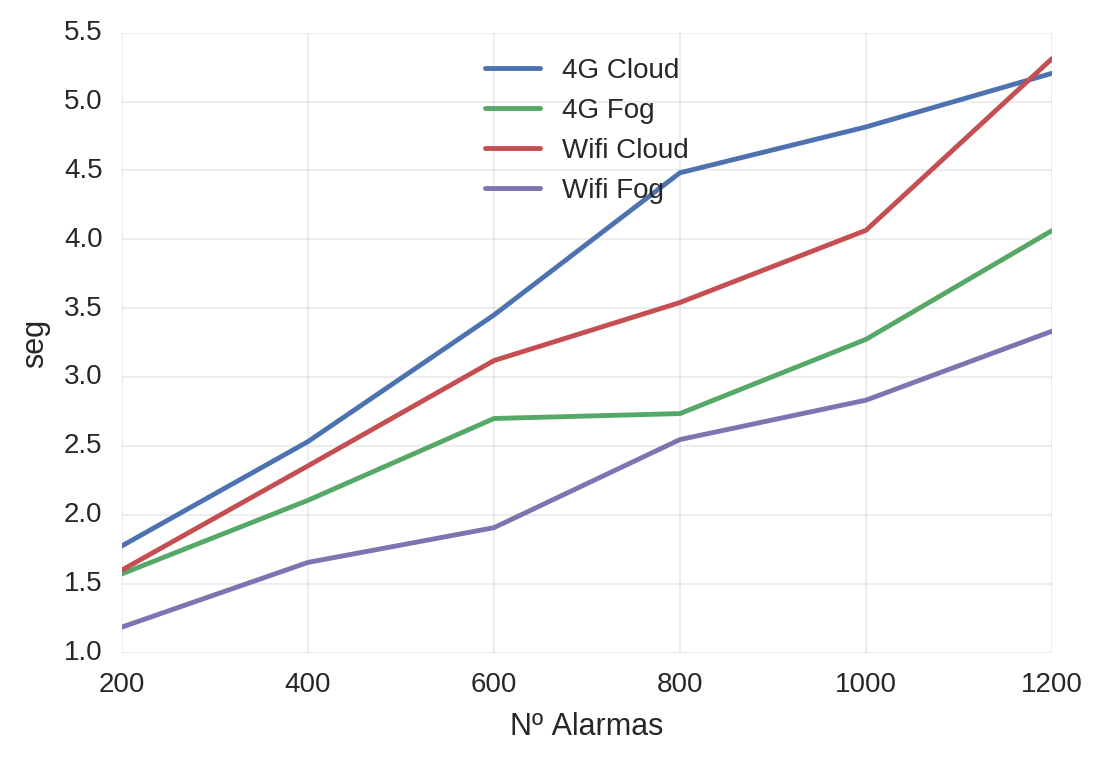

In [20]:
ldftc4 = getMean(dft200c4, dft400c4, dft600c4, dft800c4, dft1000c4, dft1200c4,"latency in seconds")
ldftf4 = getMean(dft200f4, dft400f4, dft600f4, dft800f4, dft1000f4, dft1200f4,"latency in seconds")
ldftwf = getMean(dft200wf, dft400wf, dft600wf, dft800wf, dft1000wf, dft1200wf,"latency in seconds")
ldftwc = getMean(dft200wc, dft400wc, dft600wc, dft800wc, dft1000wc, dft1200wc,"latency in seconds")

CastAndPlot4(ldftc4,ldftf4,ldftwc,ldftwf,"4G Cloud","4G Fog","Wifi Cloud","Wifi Fog","seg",morder)